In [2]:
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,VotingRegressor
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings("ignore")

In [25]:
geometric_data=pd.read_csv("C:\\Users\\Marian\\Downloads\\Geometry Descriptors Data.csv")
chemical_data=pd.read_csv("C:\\Users\\Marian\\Downloads\\Chemical Descriptors Data.csv")
labels=pd.read_csv("C:\\Users\\Marian\\Downloads\\Adsorption Labels Data.csv")
data=pd.merge(geometric_data,chemical_data,on="MOF Name")
data=pd.merge(data,labels,on="MOF Name")

X=data.drop(columns=["Methane Adsorption Performance under 5.8 Bar (mmol/g)","Methane Adsorption Performance under 65 Bar (mmol/g)","MOF Name"])
columns=X.columns
y_under5=data[["Methane Adsorption Performance under 5.8 Bar (mmol/g)"]]
y_under65=data[["Methane Adsorption Performance under 65 Bar (mmol/g)"]]

scaler=StandardScaler()
selector=VarianceThreshold(threshold=0.1)
X=scaler.fit_transform(X)
X=selector.fit_transform(X)
np.random.seed(9)

In [21]:
#Random Forest
X_train,X_test,y_train,y_test=train_test_split(X,y_under5,test_size=0.2,random_state=9)
def obj(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2"]),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5),
    }
    RF_under5=RandomForestRegressor(**params, random_state=9,n_jobs=-1).fit(X_train, y_train)
    y_pred = RF_under5.predict(X_test)
    score = r2_score(y_test, y_pred)
    trial.report(score, step=0)
    if trial.should_prune():
        raise optuna.TrialPruned()
    return score

pruner =optuna.pruners.MedianPruner(n_startup_trials=5, n_warmup_steps=0)
study= optuna.create_study(direction="maximize", pruner=pruner)
study.optimize(obj, n_trials=50)
print(study.best_trial.params,study.best_value)
                    
RF_under5=RandomForestRegressor(**study.best_trial.params,random_state=9,n_jobs=-1).fit(X_train, y_train)
y_pred=RF_under5.predict(X_test)
print(mean_absolute_error(y_test,y_pred),mean_squared_error(y_test,y_pred),r2_score(y_test,y_pred))

[I 2025-11-07 01:49:32,273] A new study created in memory with name: no-name-6b59c9e2-48b7-49f3-9443-c53135ff0352
[I 2025-11-07 01:51:00,353] Trial 0 finished with value: 0.5468088850497497 and parameters: {'n_estimators': 885, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.5468088850497497.
[I 2025-11-07 01:52:16,033] Trial 1 finished with value: 0.8968977336250532 and parameters: {'n_estimators': 252, 'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.8968977336250532.
[I 2025-11-07 01:56:27,811] Trial 2 finished with value: 0.8986157711425036 and parameters: {'n_estimators': 581, 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.8986157711425036.
[I 2025-11-07 01:58:58,578] Trial 3 finished with value: 0.8216465264267725 and parameters: {'n_estimators': 451, 'max_depth': 11, 'ma

{'n_estimators': 779, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'min_samples_leaf': 3} 0.9065270221125215
0.3064366235211449 0.1890114417066399 0.9065270221125215


In [22]:
#Random Forest
X_train,X_test,y_train,y_test=train_test_split(X,y_under65,test_size=0.2,random_state=9)
def obj(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2"]),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5),
    }
    RF_under65=RandomForestRegressor(**params, random_state=9,n_jobs=-1).fit(X_train, y_train)
    y_pred = RF_under65.predict(X_test)
    score = r2_score(y_test, y_pred)
    trial.report(score, step=0)
    if trial.should_prune():
        raise optuna.TrialPruned()
    return score

pruner =optuna.pruners.MedianPruner(n_startup_trials=5, n_warmup_steps=0)
study= optuna.create_study(direction="maximize", pruner=pruner)
study.optimize(obj, n_trials=50)
print(study.best_trial.params,study.best_value)
                    
RF_under65=RandomForestRegressor(**study.best_trial.params,random_state=9,n_jobs=-1).fit(X_train, y_train)
y_pred=RF_under65.predict(X_test)
print(mean_absolute_error(y_test,y_pred),mean_squared_error(y_test,y_pred),r2_score(y_test,y_pred))

[I 2025-11-07 05:12:13,334] A new study created in memory with name: no-name-c52ccbed-f9aa-4771-9e6f-bec6af85c168
[I 2025-11-07 05:13:04,045] Trial 0 finished with value: 0.8043222849760201 and parameters: {'n_estimators': 713, 'max_depth': 3, 'max_features': 'log2', 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.8043222849760201.
[I 2025-11-07 05:17:34,960] Trial 1 finished with value: 0.9873108698954967 and parameters: {'n_estimators': 710, 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_split': 10, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.9873108698954967.
[I 2025-11-07 05:18:25,365] Trial 2 finished with value: 0.9882381850422609 and parameters: {'n_estimators': 127, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 2 with value: 0.9882381850422609.
[I 2025-11-07 05:20:13,763] Trial 3 finished with value: 0.9759712865229914 and parameters: {'n_estimators': 528, 'max_depth': 11, 'm

{'n_estimators': 493, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'min_samples_leaf': 1} 0.9913647906783981
0.46195924935474914 0.39127705537576535 0.9913647906783981


0.2746981405881127 0.15810113026971537 0.9218132864325571


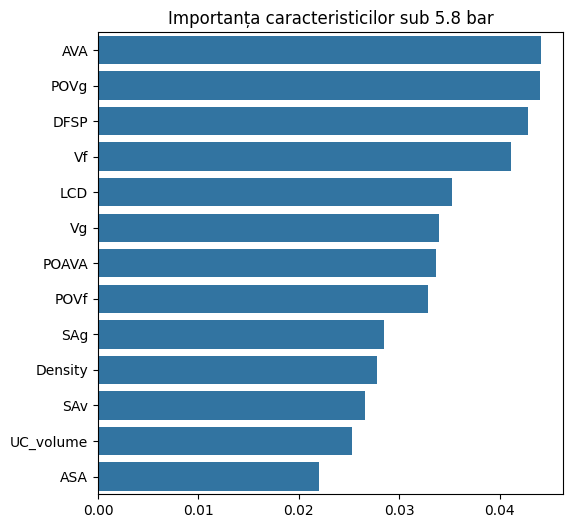

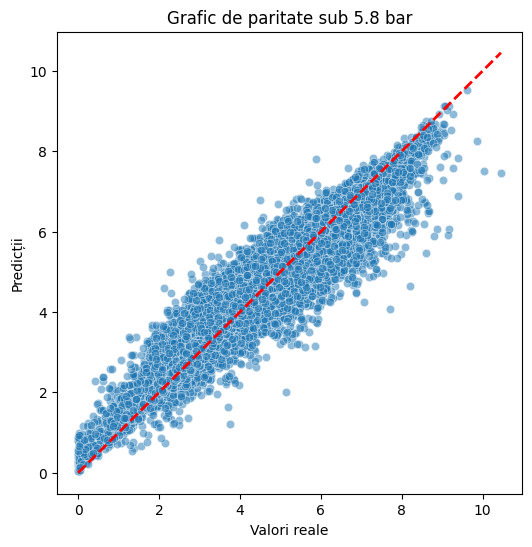

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y_under5,test_size=0.2,random_state=9)
RF_under5_2=RandomForestRegressor(n_estimators=500,random_state=9,n_jobs=-1,max_features="sqrt").fit(X_train, y_train)
y_pred=RF_under5_2.predict(X_test)
print(mean_absolute_error(y_test,y_pred),mean_squared_error(y_test,y_pred),r2_score(y_test,y_pred))

features_imp=RF_under5_2.feature_importances_
ind=np.argsort(features_imp)[::-1]
plt.figure(figsize=(6,6))
sns.barplot(x=features_imp[ind][:13],y=np.array(data.drop(columns=["MOF Name","Methane Adsorption Performance under 5.8 Bar (mmol/g)","Methane Adsorption Performance under 65 Bar (mmol/g)"]).columns[ind][:13]))
plt.title("Importanța caracteristicilor sub 5.8 bar")
plt.show()

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test.values.flatten(), y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],'r--', lw=2)
plt.xlabel("Valori reale")
plt.ylabel("Predicții")
plt.title("Grafic de paritate sub 5.8 bar")
plt.show()

0.44317498326014704 0.36632744197928285 0.9919154110922753


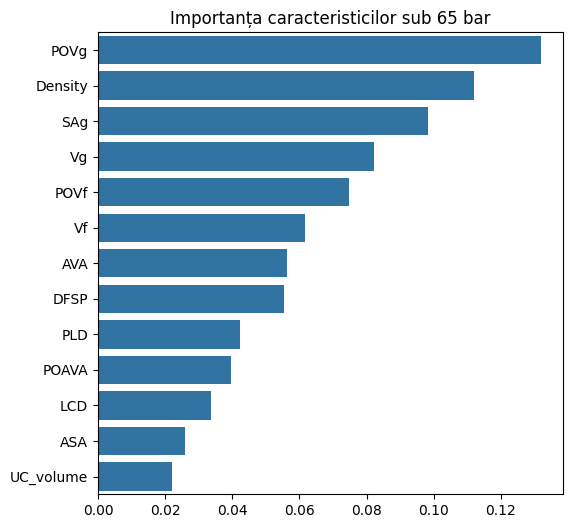

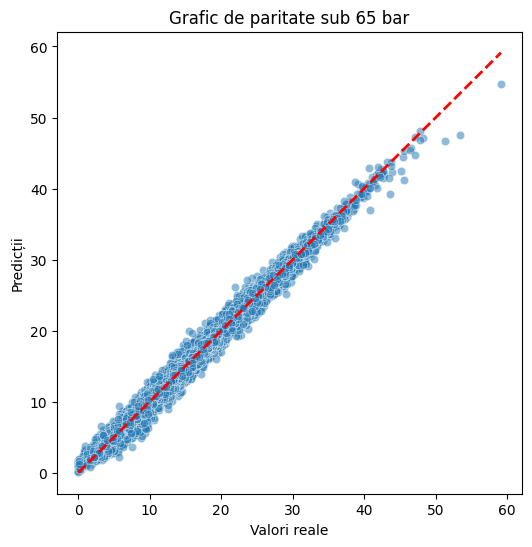

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y_under65,test_size=0.2,random_state=9)
RF_under65_2=RandomForestRegressor(n_estimators=500,random_state=9,n_jobs=-1,max_features="sqrt").fit(X_train, y_train)
y_pred=RF_under65_2.predict(X_test)
print(mean_absolute_error(y_test,y_pred),mean_squared_error(y_test,y_pred),r2_score(y_test,y_pred))

features_imp=RF_under65_2.feature_importances_
ind=np.argsort(features_imp)[::-1]
plt.figure(figsize=(6,6))
sns.barplot(x=features_imp[ind][:13],y=np.array(data.drop(columns=["MOF Name","Methane Adsorption Performance under 5.8 Bar (mmol/g)","Methane Adsorption Performance under 65 Bar (mmol/g)"]).columns[ind][:13]))
plt.title("Importanța caracteristicilor sub 65 bar")
plt.show()

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test.values.flatten(), y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],'r--', lw=2)
plt.xlabel("Valori reale")
plt.ylabel("Predicții")
plt.title("Grafic de paritate sub 65 bar")
plt.show()

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y_under5,test_size=0.2,random_state=9)
xgb_under5=XGBRegressor(n_estimators=2000,learning_rate=0.05).fit(X_train,y_train)
y_pred=xgb_under5.predict(X_test)
print(mean_absolute_error(y_test,y_pred),mean_squared_error(y_test,y_pred),r2_score(y_test,y_pred))

0.23898606404468445 0.11439657530614802 0.943426787853241


In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y_under65,test_size=0.2,random_state=9)
xgb_under65=XGBRegressor(n_estimators=2000,learning_rate=0.05).fit(X_train,y_train)
y_pred=xgb_under65.predict(X_test)
print(mean_absolute_error(y_test,y_pred),mean_squared_error(y_test,y_pred),r2_score(y_test,y_pred))

support_mask = selector.get_support()
selected_columns = np.array(columns)[support_mask]
features_imp=catboost_under65.feature_importances_
ind=np.argsort(features_imp)[::-1]
plt.figure(figsize=(6,6))
sns.barplot(x=features_imp[ind][:13],y=selected_columns[ind][:13])
plt.title("Importanța caracteristicilor sub 65 bar")
plt.show()

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test.values.flatten(), y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],'r--', lw=2)
plt.xlabel("Valori reale")
plt.ylabel("Predicții")
plt.title("Grafic de paritate sub 65 bar")
plt.show()

0.37735845074913565 0.25117023953347145 0.9944568276405334


0.2784973185964774 0.1499145437027976 0.9258618488805973


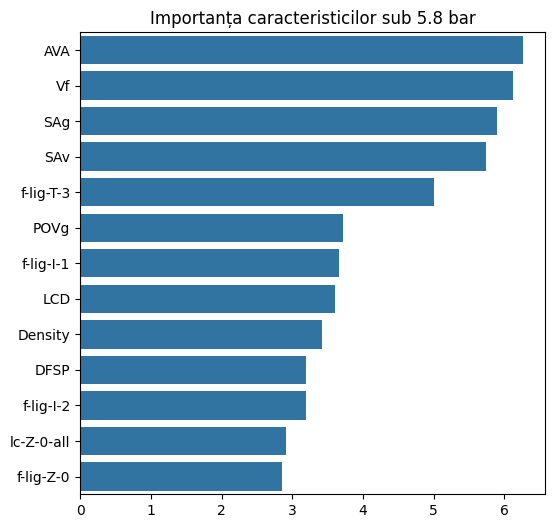

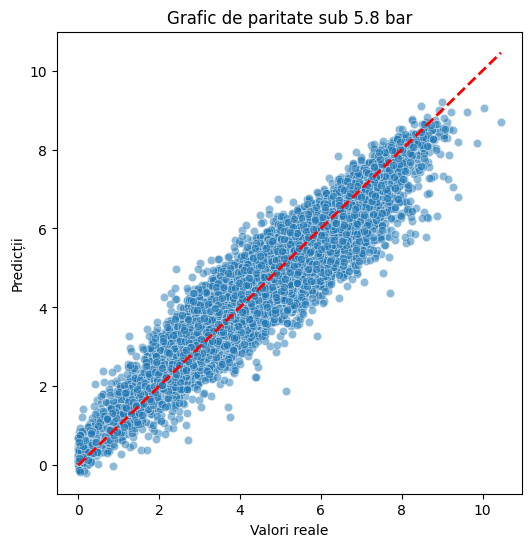

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y_under5,test_size=0.2,random_state=9)
catboost_under5=CatBoostRegressor(n_estimators=2000,learning_rate=0.05,verbose=0).fit(X_train,y_train)
y_pred=catboost_under5.predict(X_test)
print(mean_absolute_error(y_test,y_pred),mean_squared_error(y_test,y_pred),r2_score(y_test,y_pred))

support_mask = selector.get_support()
selected_columns = np.array(columns)[support_mask]
features_imp=catboost_under5.feature_importances_
ind=np.argsort(features_imp)[::-1]
plt.figure(figsize=(6,6))
sns.barplot(x=features_imp[ind][:13],y=selected_columns[ind][:13])
plt.title("Importanța caracteristicilor sub 5.8 bar")
plt.show()

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test.values.flatten(), y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],'r--', lw=2)
plt.xlabel("Valori reale")
plt.ylabel("Predicții")
plt.title("Grafic de paritate sub 5.8 bar")
plt.show()

0.4299824476804466 0.31640279941383503 0.9930172128282467


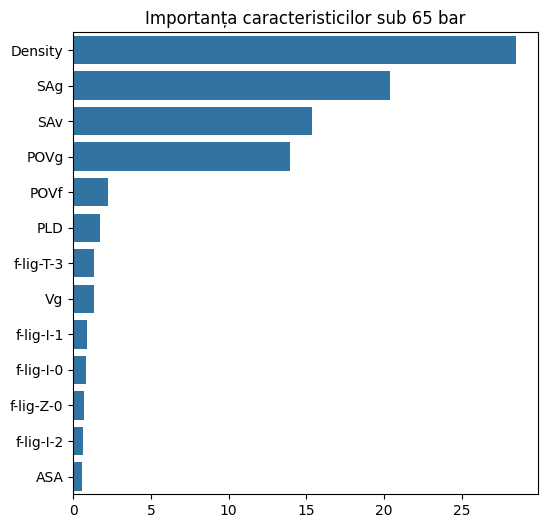

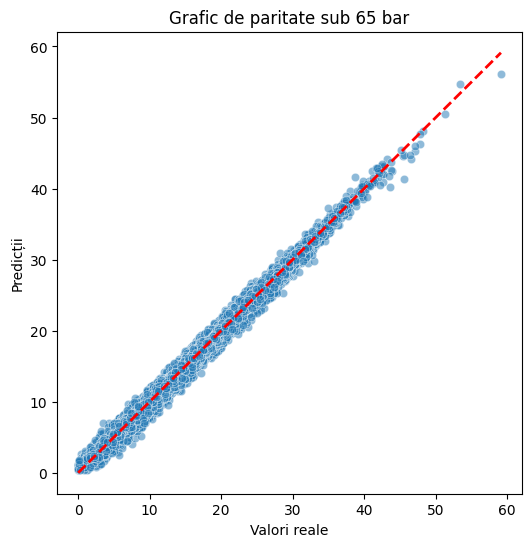

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y_under65,test_size=0.2,random_state=9)
catboost_under65=CatBoostRegressor(n_estimators=2000,learning_rate=0.05,verbose=0).fit(X_train,y_train)
y_pred=catboost_under65.predict(X_test)
print(mean_absolute_error(y_test,y_pred),mean_squared_error(y_test,y_pred),r2_score(y_test,y_pred))

support_mask = selector.get_support()
selected_columns = np.array(columns)[support_mask]
features_imp=catboost_under65.feature_importances_
ind=np.argsort(features_imp)[::-1]
plt.figure(figsize=(6,6))
sns.barplot(x=features_imp[ind][:13],y=selected_columns[ind][:13])
plt.title("Importanța caracteristicilor sub 65 bar")
plt.show()

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test.values.flatten(), y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],'r--', lw=2)
plt.xlabel("Valori reale")
plt.ylabel("Predicții")
plt.title("Grafic de paritate sub 65 bar")
plt.show()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y_under5,test_size=0.2,random_state=9)
xgb_under5_2=XGBRegressor(n_estimators=10000,learning_rate=0.01).fit(X_train,y_train)
y_pred=xgb_under5_2.predict(X_test)
print(mean_absolute_error(y_test,y_pred),mean_squared_error(y_test,y_pred),r2_score(y_test,y_pred))

support_mask = selector.get_support()
selected_columns = np.array(columns)[support_mask]
features_imp=xgb_under5_2.feature_importances_
ind=np.argsort(features_imp)[::-1]
plt.figure(figsize=(6,6))
sns.barplot(x=features_imp[ind][:13],y=selected_columns[ind][:13])
plt.title("Importanța caracteristicilor sub 5.8 bar")
plt.show()

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test.values.flatten(), y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],'r--', lw=2)
plt.xlabel("Valori reale")
plt.ylabel("Predicții")
plt.title("Grafic de paritate sub 5.8 bar")
plt.show()